# Bài tập 2 - Thống kê mô tả

*(Thống kê máy tính và ứng dụng - ĐTTX Kì 2 2022-2023)*

MSSV: 21880005

Họ và tên: Pham Tuan Anh

**Trực quan hóa dữ liệu** (data visualization) là công đoạn rất quan trọng trong phân tích dữ liệu với mục đích chính là **khám phá** (explore) và **mô tả** (describe) dữ liệu. Đây là phần quan trọng trong **phân tích thăm dò dữ liệu** (Exploratory Data Analysis) hay **thống kê mô tả** (Descriptive Statistics).

**Matplotlib** (https://matplotlib.org/) là thư viện trực quan hóa phổ biến trong Python. **seaborn** (https://seaborn.pydata.org/) là thư viện trực quan cao cấp được xây dựng dựa trên matplotlib.

Các **số đo tóm tắt dữ liệu** (summary statistic) cũng là công cụ hay được dùng trong thống kê mô tả.

NumPy (https://numpy.org/), pandas (https://pandas.pydata.org/), SciPy (https://scipy.org/) hỗ trợ đầy đủ việc tính toán các số đo này.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Câu 1 (2 điểm)

Vẽ đồ thị các hàm số sau trên khoảng $[-2, 2]$
1. $y = x$
1. $y = x^2$
1. $y = |x|$ 

trên cùng một hệ biểu đồ (hệ trục) hay riêng lẻ trên từng biểu đồ. Thử dùng các style khác nhau mà matplotlib hỗ trợ.

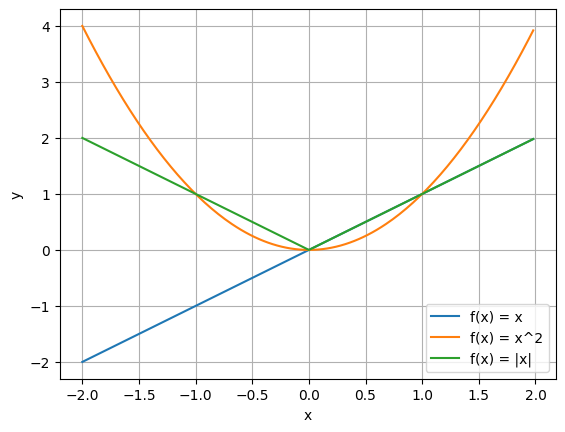

In [2]:
X = np.arange(-2,2,0.02)
fig = plt.figure()

Y = X
Y2= X**2
Y3= abs(X)
plt.plot(X,Y,label='f(x) = x')
plt.plot(X,Y2,label='f(x) = x^2')
plt.plot(X,Y3,label='f(x) = |x|')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

### Bộ dữ liệu `Titanic`

Dữ liệu `Titanic Dataset`: https://vincentarelbundock.github.io/Rdatasets/datasets.html, https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv

Tham khảo: https://vincentarelbundock.github.io/Rdatasets/doc/carData/TitanicSurvival.html.

In [3]:
titanic = pd.read_csv("TitanicSurvival.csv")
titanic

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd


Bỏ cột đầu tiên (cột tên)

In [4]:
try:
    titanic.drop("Unnamed: 0", axis=1, inplace=True)
except:
    pass

titanic

,survived,sex,age,passengerClass
0,yes,female,29.0000,1st
1,yes,male,0.9167,1st
2,no,female,2.0000,1st
3,no,male,30.0000,1st
4,no,female,25.0000,1st
...,...,...,...,...
1304,no,female,14.5000,3rd
1305,no,female,NaN,3rd
1306,no,male,26.5000,3rd
1307,no,male,27.0000,3rd


In [5]:
titanic.isna().sum()

survived            0
sex                 0
age               263
passengerClass      0
dtype: int64

Cột age có 263 NaN.

In [6]:
titanic.describe()

,age
count,1046.000000
mean,29.881135
std,14.413500
min,0.166700
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [7]:
titanic.survived.describe()

count     1309
unique       2
top         no
freq       809
Name: survived, dtype: object

### Câu 2 (1 điểm)

1. Vẽ biểu đồ quạt cho biết tần số các nhóm của hạng hành khách (passengerClass) trong bộ dữ liệu Titanic.
1. Vẽ biểu đồ thanh cho biết tần số các nhóm của hạng hành khách.

Chuẩn bi dữ lieu

In [8]:

# plt.pie(titanic['passengerClass'])
# passenger = titanic['passengerClass'].unique()
#Define color to use
colors = sns.color_palette('pastel')[0:5]
passenger = pd.Series(titanic['passengerClass']).value_counts().sort_index().reset_index().reset_index(drop=True)
passenger.columns = ['Labels', 'Size']
total = passenger['Size'].sum()
passenger['Percentage'] = passenger['Size']/total
passenger

,Labels,Size,Percentage
0,1st,323,0.246753
1,2nd,277,0.211612
2,3rd,709,0.541635


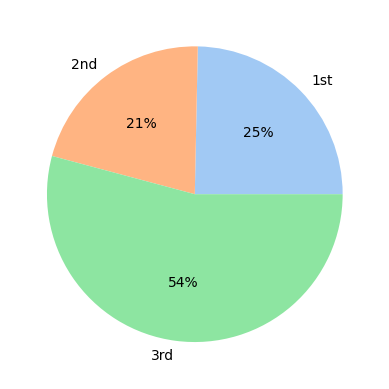

In [9]:
fig, ax = plt.subplots()
ax.pie(passenger["Size"],labels=passenger['Labels'],autopct='%.0f%%', colors=colors)

plt.show()

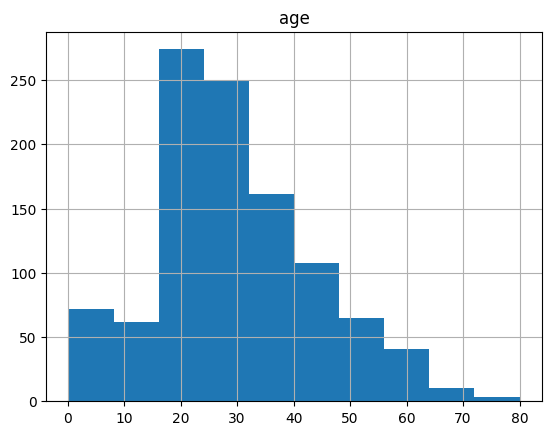

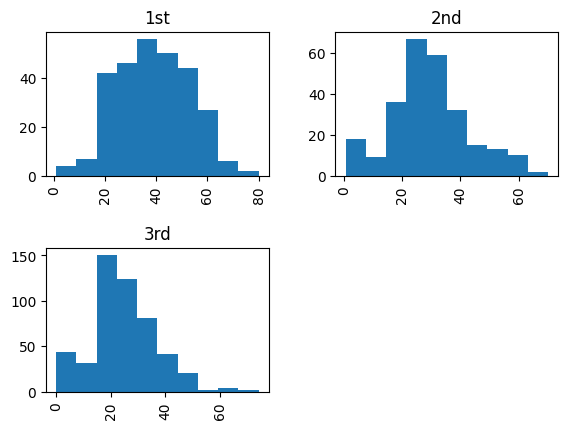

In [10]:
titanic.hist()
titanic.hist(by='passengerClass')

plt.show()

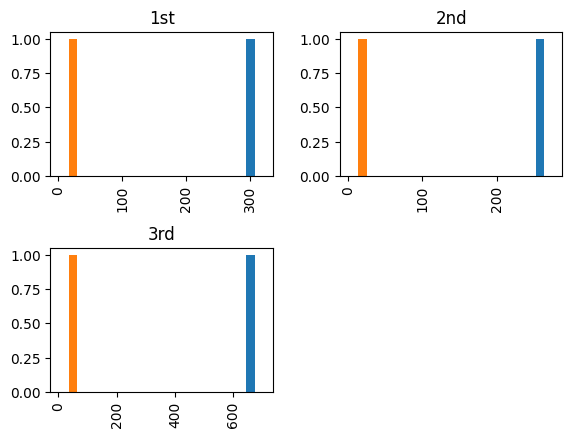

In [11]:
passenger.hist(by='Labels')
plt.show()

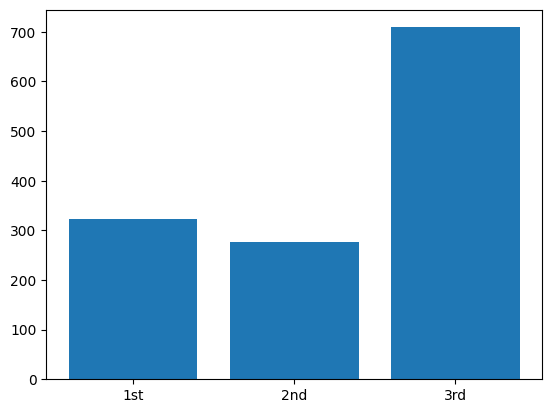

In [12]:
fig, ax = plt.subplots()
ax.bar(x=passenger['Labels'],height=passenger['Size'])
plt.show()

### Câu 3 (1 điểm)

1. Vẽ biểu đồ thanh gom nhóm cho tần số sống chết (survived) chia theo hạng hành khách. 
1. Vẽ biểu đồ thanh xếp chồng cho tần số sống chết chia theo hạng hành khách.

In [13]:
titanic.head()

,survived,sex,age,passengerClass
0,yes,female,29.0000,1st
1,yes,male,0.9167,1st
2,no,female,2.0000,1st
3,no,male,30.0000,1st
4,no,female,25.0000,1st


In [26]:

passengersummary = pd.DataFrame()
passengersummary['class'] = titanic['passengerClass'].unique()
passengersummary['survived_count']=lambda x: passengersummary['class']

In [ ]:
survived.bar()

AttributeError: 'DataFrame' object has no attribute 'bar'

### Câu 4 (1 điểm)

1. Vẽ histogram cho tuổi (age) với các khoảng chia đều.
1. Vẽ histogram cho tuổi với các khoảng chia không đều: 0 - 5 - 20 - 30 - 40 - 60 - 80.

### Câu 5 (1 điểm)

1. Vẽ histogram kề cho tuổi theo nhóm sống chết.
1. Vẽ histogram xếp chồng cho tuổi theo nhóm sống chết.

In [ ]:
titanic.age.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

### Câu 6 (1 điểm)

1. Dùng histogram kiểm tra xem tuổi có ngoại lai hay không? 
1. Dùng boxplot kiểm tra xem tuổi có ngoại lai hay không?
1. Tính trung bình, trung vị của tuổi và so sánh.

### Câu 7 (1 điểm)

1. Tính các số đo tóm tắt hay dùng cho tuổi.
1. Tính các số đo tóm tắt hay dùng cho tuổi chia theo nhóm sống chết. 

#### Cau a

In [ ]:
titanic.age.describe()


count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

#### Cau b

In [ ]:
survived = titanic[titanic['survived']=='yes']
deaded =  titanic[titanic['dead']=='no']
survived.head()


KeyError: 'dead'

### Câu 8 (3 điểm)
Tập tin `WHO-COVID-19-global-data.csv` chứa dữ liệu số lượng ca nhiễm và chết do COVID-19 của các nước từ đầu năm 2020 đến hết tháng 3 năm 2023 (nguồn WHO: https://covid19.who.int/WHO-COVID-19-global-data.csv).

Tham khảo: https://covid19.who.int/, https://covid19.who.int/data.

1.	"Trích và mô tả" dữ liệu của Việt Nam (mã quốc gia là VN).
1.	<mark>Cộng điểm</mark> "So sánh" dữ liệu của Việt Nam với Thái Land (mã quốc gia là TH).